# Import dataset

In [197]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv('loan.csv')

In [199]:
print(df.shape)
df.head()

(38642, 8)


,id,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,loan_status
0,1077501,5000,5000,10.65,162.87,10,24000.0,Low Risk
1,1077430,2500,2500,15.27,59.83,1,30000.0,High Risk
2,1077175,2400,2400,15.96,84.33,10,12252.0,Low Risk
3,1076863,10000,10000,13.49,339.31,10,49200.0,Low Risk
4,1075358,3000,3000,12.69,67.79,1,80000.0,Medium Risk


In [200]:
df.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc
count,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,3.864200e+04
mean,6.810404e+05,11291.615988,11017.101211,12.052427,326.760477,5.092050,6.960828e+04
std,2.113045e+05,7462.136215,7193.038828,3.716705,209.143908,3.408338,6.425320e+04
min,5.473400e+04,500.000000,500.000000,5.420000,15.690000,1.000000,4.000000e+03
25%,5.134350e+05,5500.000000,5500.000000,9.320000,168.442500,2.000000,4.140000e+04
50%,6.627705e+05,10000.000000,9950.000000,11.860000,282.830000,4.000000,6.000000e+04
75%,8.364912e+05,15000.000000,15000.000000,14.590000,434.397500,9.000000,8.319999e+04
max,1.077501e+06,35000.000000,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38642 entries, 0 to 38641
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           38642 non-null  int64  
 1   loan_amnt    38642 non-null  int64  
 2   funded_amnt  38642 non-null  int64  
 3   int_rate     38642 non-null  float64
 4   installment  38642 non-null  float64
 5   emp_length   38642 non-null  int64  
 6   annual_inc   38642 non-null  float64
 7   loan_status  38642 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ MB


In [202]:
df['loan_status'].value_counts()

loan_status
Low Risk       32145
High Risk       5399
Medium Risk     1098
Name: count, dtype: int64

In [203]:
df.duplicated().sum()
# no duplicate values are present

0

# Visualize the data

In [204]:
#df['loan_status'] = df['loan_status'].map({'Low Risk':0, 'High Risk':1, 'Medium Risk':2})

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df['funded_perc'] = df['funded_amnt']/df['loan_amnt']
df['incToLoan_perc'] = df['annual_inc']/df['loan_amnt']

In [207]:
df.drop(['id', 'funded_amnt'], inplace=True, axis=1)

<Axes: >

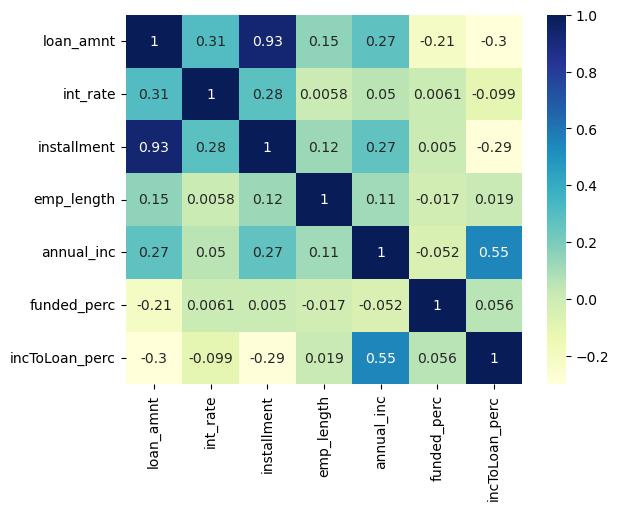

In [208]:
sns.heatmap(df.drop('loan_status', axis=1).corr(), cmap='YlGnBu', annot=True)

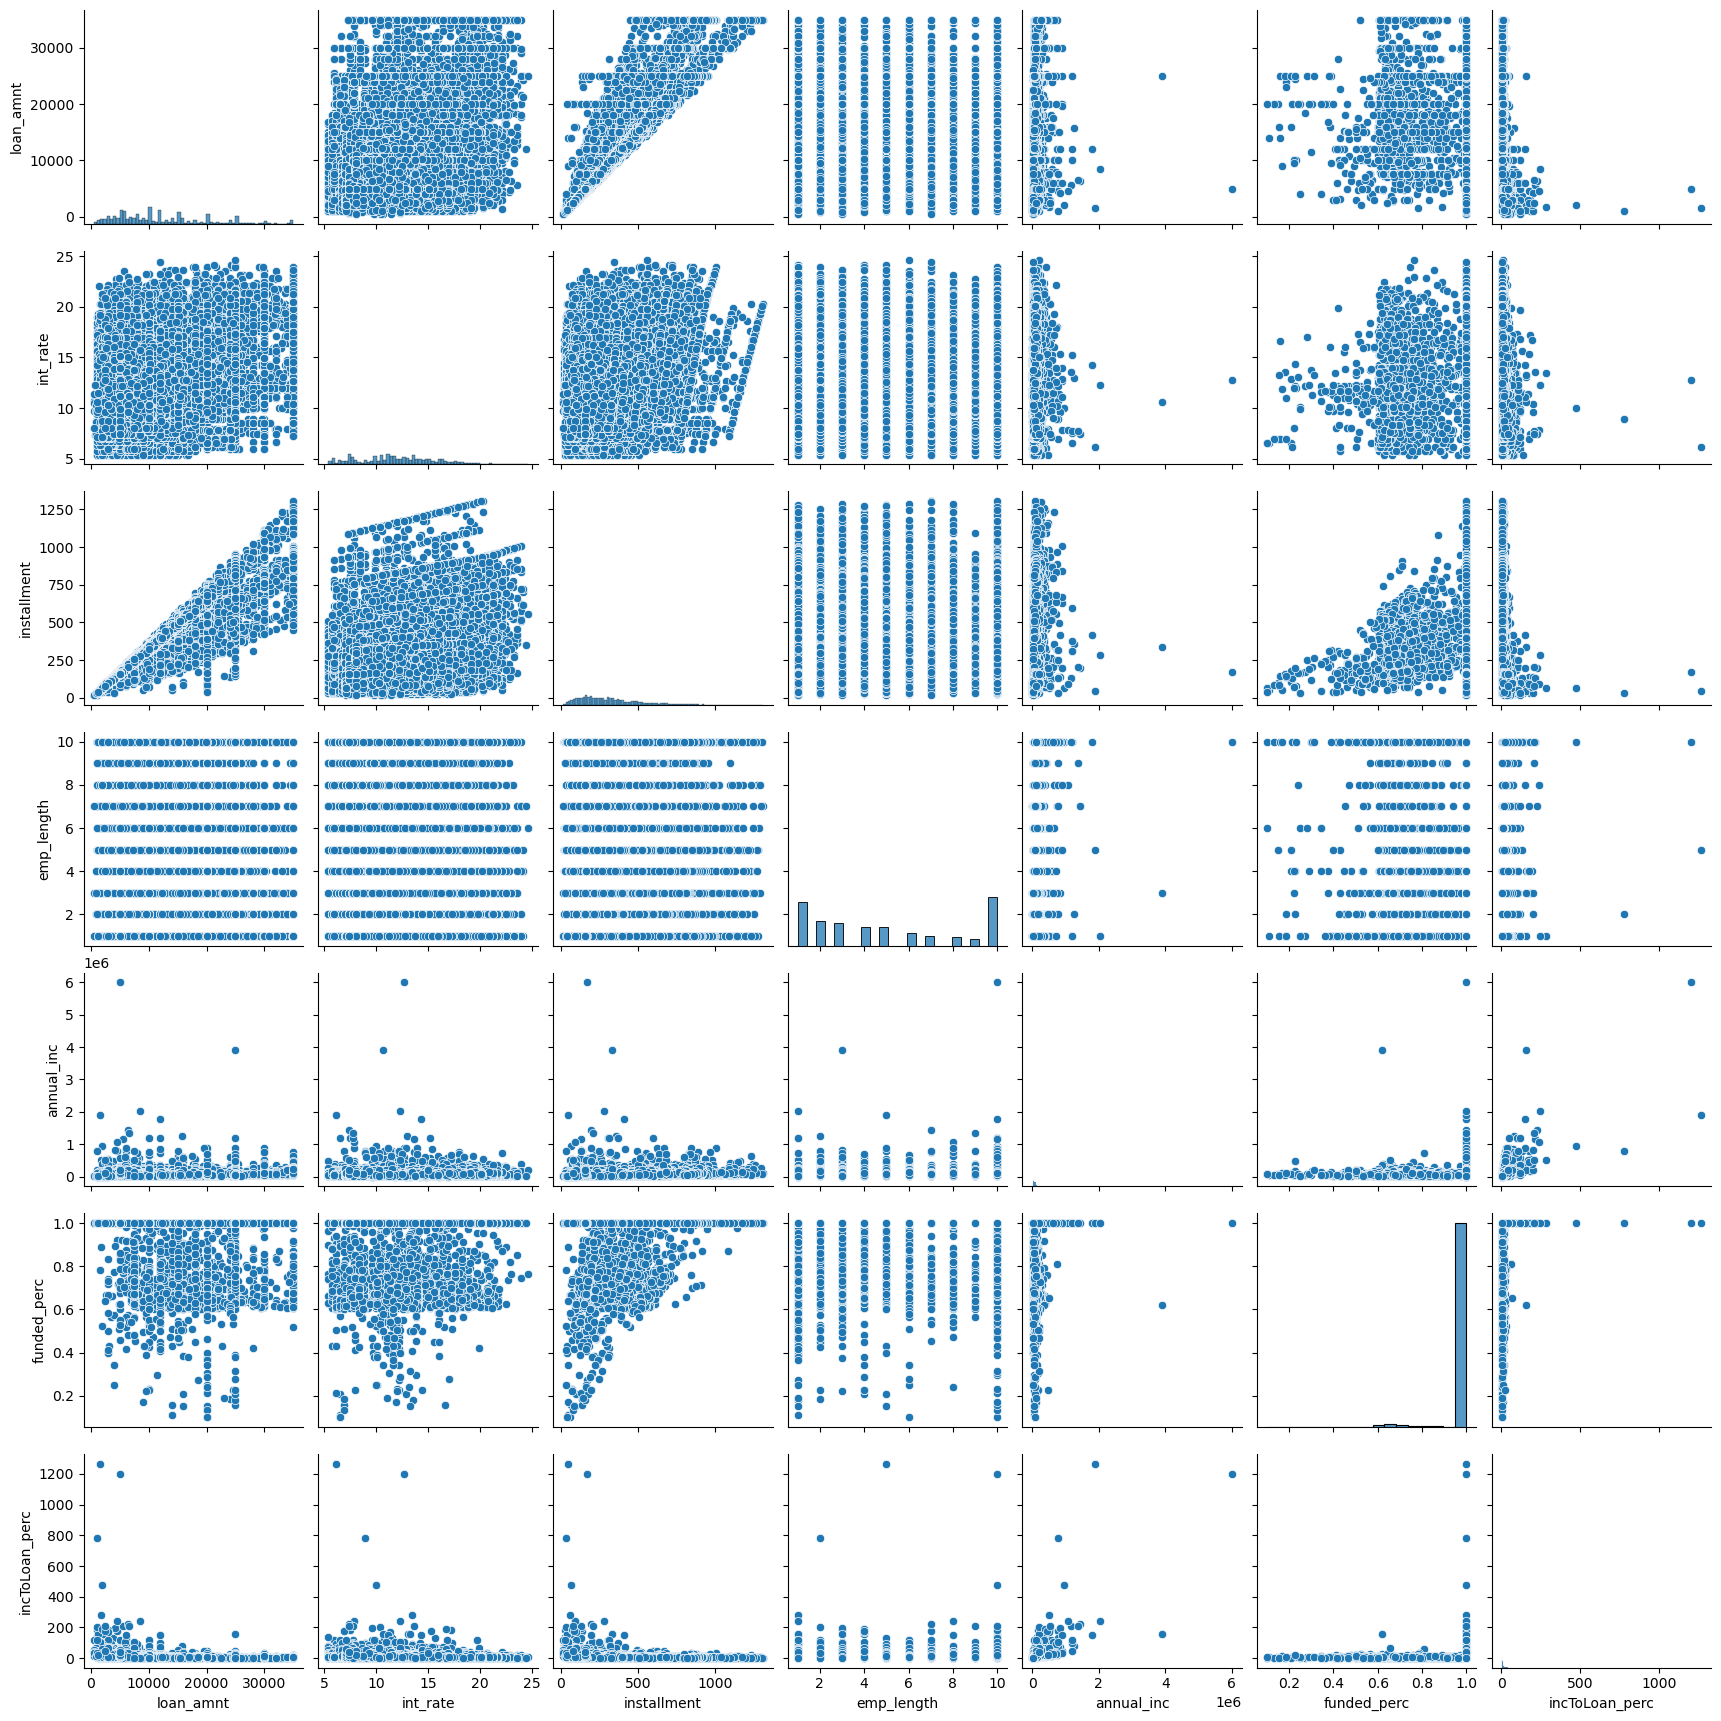

In [209]:
sns.pairplot(df)

# Train Test Split

In [210]:
import statsmodels 
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [211]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=10)

In [212]:
y_train = df_train.pop('loan_status')
X_train = df_train
y_test = df_test.pop('loan_status')
X_test = df_test

In [213]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(27049,) (27049, 7) (11593,) (11593, 7)


# Scaling

In [214]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'funded_perc', 'incToLoan_perc']

In [215]:
X_train.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,funded_perc,incToLoan_perc
count,27049.000000,27049.000000,27049.000000,27049.000000,2.704900e+04,27049.000000,27049.000000
mean,11254.532515,12.036718,325.826340,5.091316,6.956069e+04,0.985462,8.949524
std,7482.174192,3.716298,210.092906,3.413531,6.469668e+04,0.070439,14.910028
min,500.000000,5.420000,15.690000,1.000000,4.080000e+03,0.101250,1.220000
25%,5500.000000,9.250000,167.730000,2.000000,4.100000e+04,1.000000,4.000000
50%,10000.000000,11.860000,280.970000,4.000000,6.000000e+04,1.000000,6.122449
75%,15000.000000,14.540000,431.370000,9.000000,8.350000e+04,1.000000,10.166667
max,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,1.000000,1266.666667


In [216]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
print(y_train.shape, X_train_scaled.shape, y_test.shape, X_test_scaled.shape)

(27049,) (27049, 7) (11593,) (11593, 7)


# Model building

In [218]:
LR = LogisticRegression()
oneVsrest = OneVsRestClassifier(LR)
oneVsrest.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [219]:
prediction_one_vs_rest_train = oneVsrest.predict(X_train_scaled)
prediction_one_vs_rest_test = oneVsrest.predict(X_test_scaled)

In [220]:
print("Train accuracy " ,  accuracy_score(y_train, prediction_one_vs_rest_train))
print("Test accuracy " ,  accuracy_score(y_test, prediction_one_vs_rest_test))

Train accuracy  0.8328958556693409
Test accuracy  0.8286897265591305


In [221]:
print(f"Classification Report: \n\n{classification_report(y_train, prediction_one_vs_rest_train)}")

Classification Report: 

              precision    recall  f1-score   support

   High Risk       0.32      0.00      0.01      3745
    Low Risk       0.83      1.00      0.91     22538
 Medium Risk       0.33      0.00      0.00       766

    accuracy                           0.83     27049
   macro avg       0.49      0.33      0.31     27049
weighted avg       0.75      0.83      0.76     27049



In [222]:
print(f"Classification Report: \n\n{classification_report(y_test, prediction_one_vs_rest_test)}")

Classification Report: 

              precision    recall  f1-score   support

   High Risk       0.36      0.00      0.01      1654
    Low Risk       0.83      1.00      0.91      9607
 Medium Risk       1.00      0.00      0.01       332

    accuracy                           0.83     11593
   macro avg       0.73      0.34      0.31     11593
weighted avg       0.77      0.83      0.75     11593



# Analyzing the model

In [223]:
X_test['Scaled'] = X_test_scaled.tolist()
X_test['Actual'] = y_test
X_test['Predicted'] = prediction_one_vs_rest_test
temp_pred_prob = oneVsrest.predict_proba(X_test_scaled)
X_test['Prob'] = temp_pred_prob.tolist()
X_test['ProbHighRisk'] = temp_pred_prob[:,0].tolist()
X_test['ProbLowRisk'] = temp_pred_prob[:,1].tolist()
X_test['ProbMediumRisk'] = temp_pred_prob[:,2].tolist()

In [224]:
X_test.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,funded_perc,incToLoan_perc,Scaled,Actual,Predicted,Prob,ProbHighRisk,ProbLowRisk,ProbMediumRisk
17614,25000,16.77,888.46,1,104000.0,1.0,4.160000,"[0.7101449275362319, 0.5920709441836202, 0.676...",Low Risk,Low Risk,"[0.14588585499020426, 0.8452231540169446, 0.00...",0.145886,0.845223,0.008891
3728,3600,7.51,112.00,2,31800.0,1.0,8.833333,"[0.08985507246376812, 0.10902451747522168, 0.0...",Low Risk,Low Risk,"[0.07173375819820882, 0.9220391293751664, 0.00...",0.071734,0.922039,0.006227
37880,9000,11.97,298.80,2,57500.0,1.0,6.388889,"[0.24637681159420288, 0.34167970787689095, 0.2...",Low Risk,Low Risk,"[0.11734311246191244, 0.8717128389809616, 0.01...",0.117343,0.871713,0.010944
33951,17000,12.18,566.10,10,63504.0,1.0,3.735529,"[0.47826086956521735, 0.3526343244653103, 0.42...",High Risk,Low Risk,"[0.11153822345047502, 0.8750844697979352, 0.01...",0.111538,0.875084,0.013377
982,5500,14.27,188.70,5,24000.0,1.0,4.363636,"[0.14492753623188404, 0.46165884194053197, 0.1...",Low Risk,Low Risk,"[0.17301426306979648, 0.8065973393854428, 0.02...",0.173014,0.806597,0.020388


In [237]:
print(oneVsrest.classes_)
print(oneVsrest.get_params())

['High Risk' 'Low Risk' 'Medium Risk']
{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_jobs': None, 'verbose': 0}
